# Import Data

In [2]:
!pip install ucimlrepo

# Data Initalize

In [17]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as mis

# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 

print("X : ", X.shape)
print("Y : ", y.shape)
X.columns

X :  (1700, 111)
Y :  (1700, 12)


Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG',
       ...
       'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
       'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n'],
      dtype='object', length=111)

In [4]:
X

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1698,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,...,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0


# Check Missing Values

<Axes: >

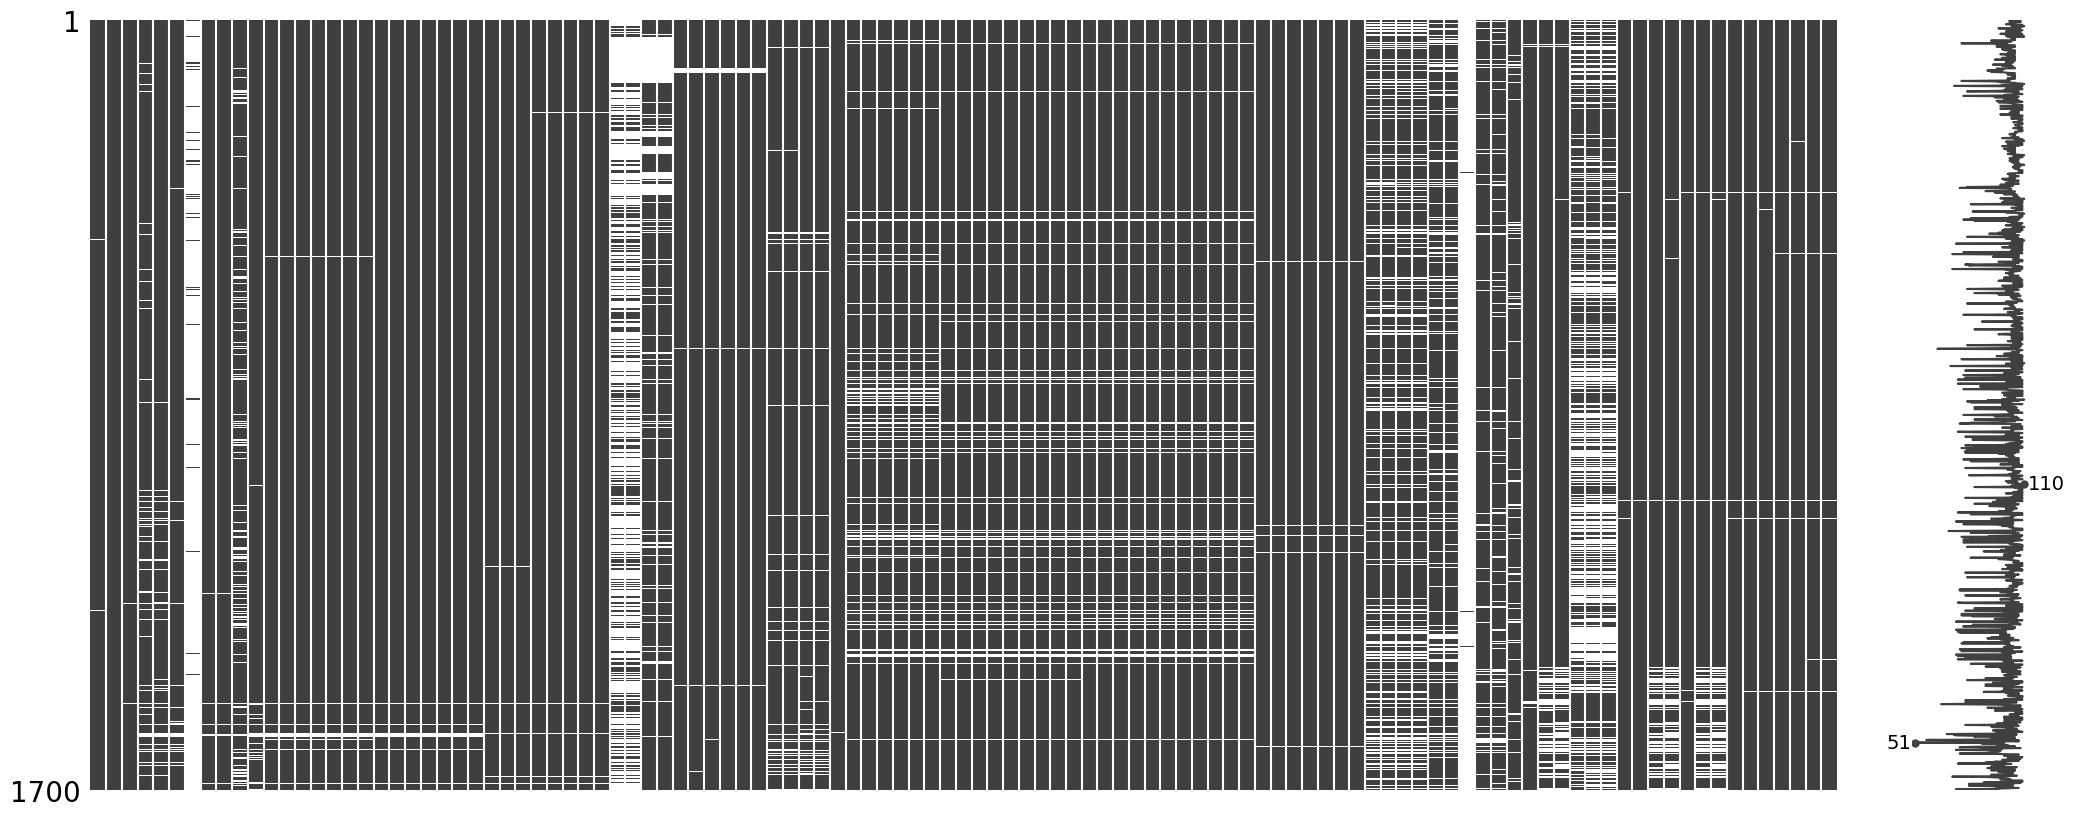

In [18]:
mis.matrix(X)

<Axes: >

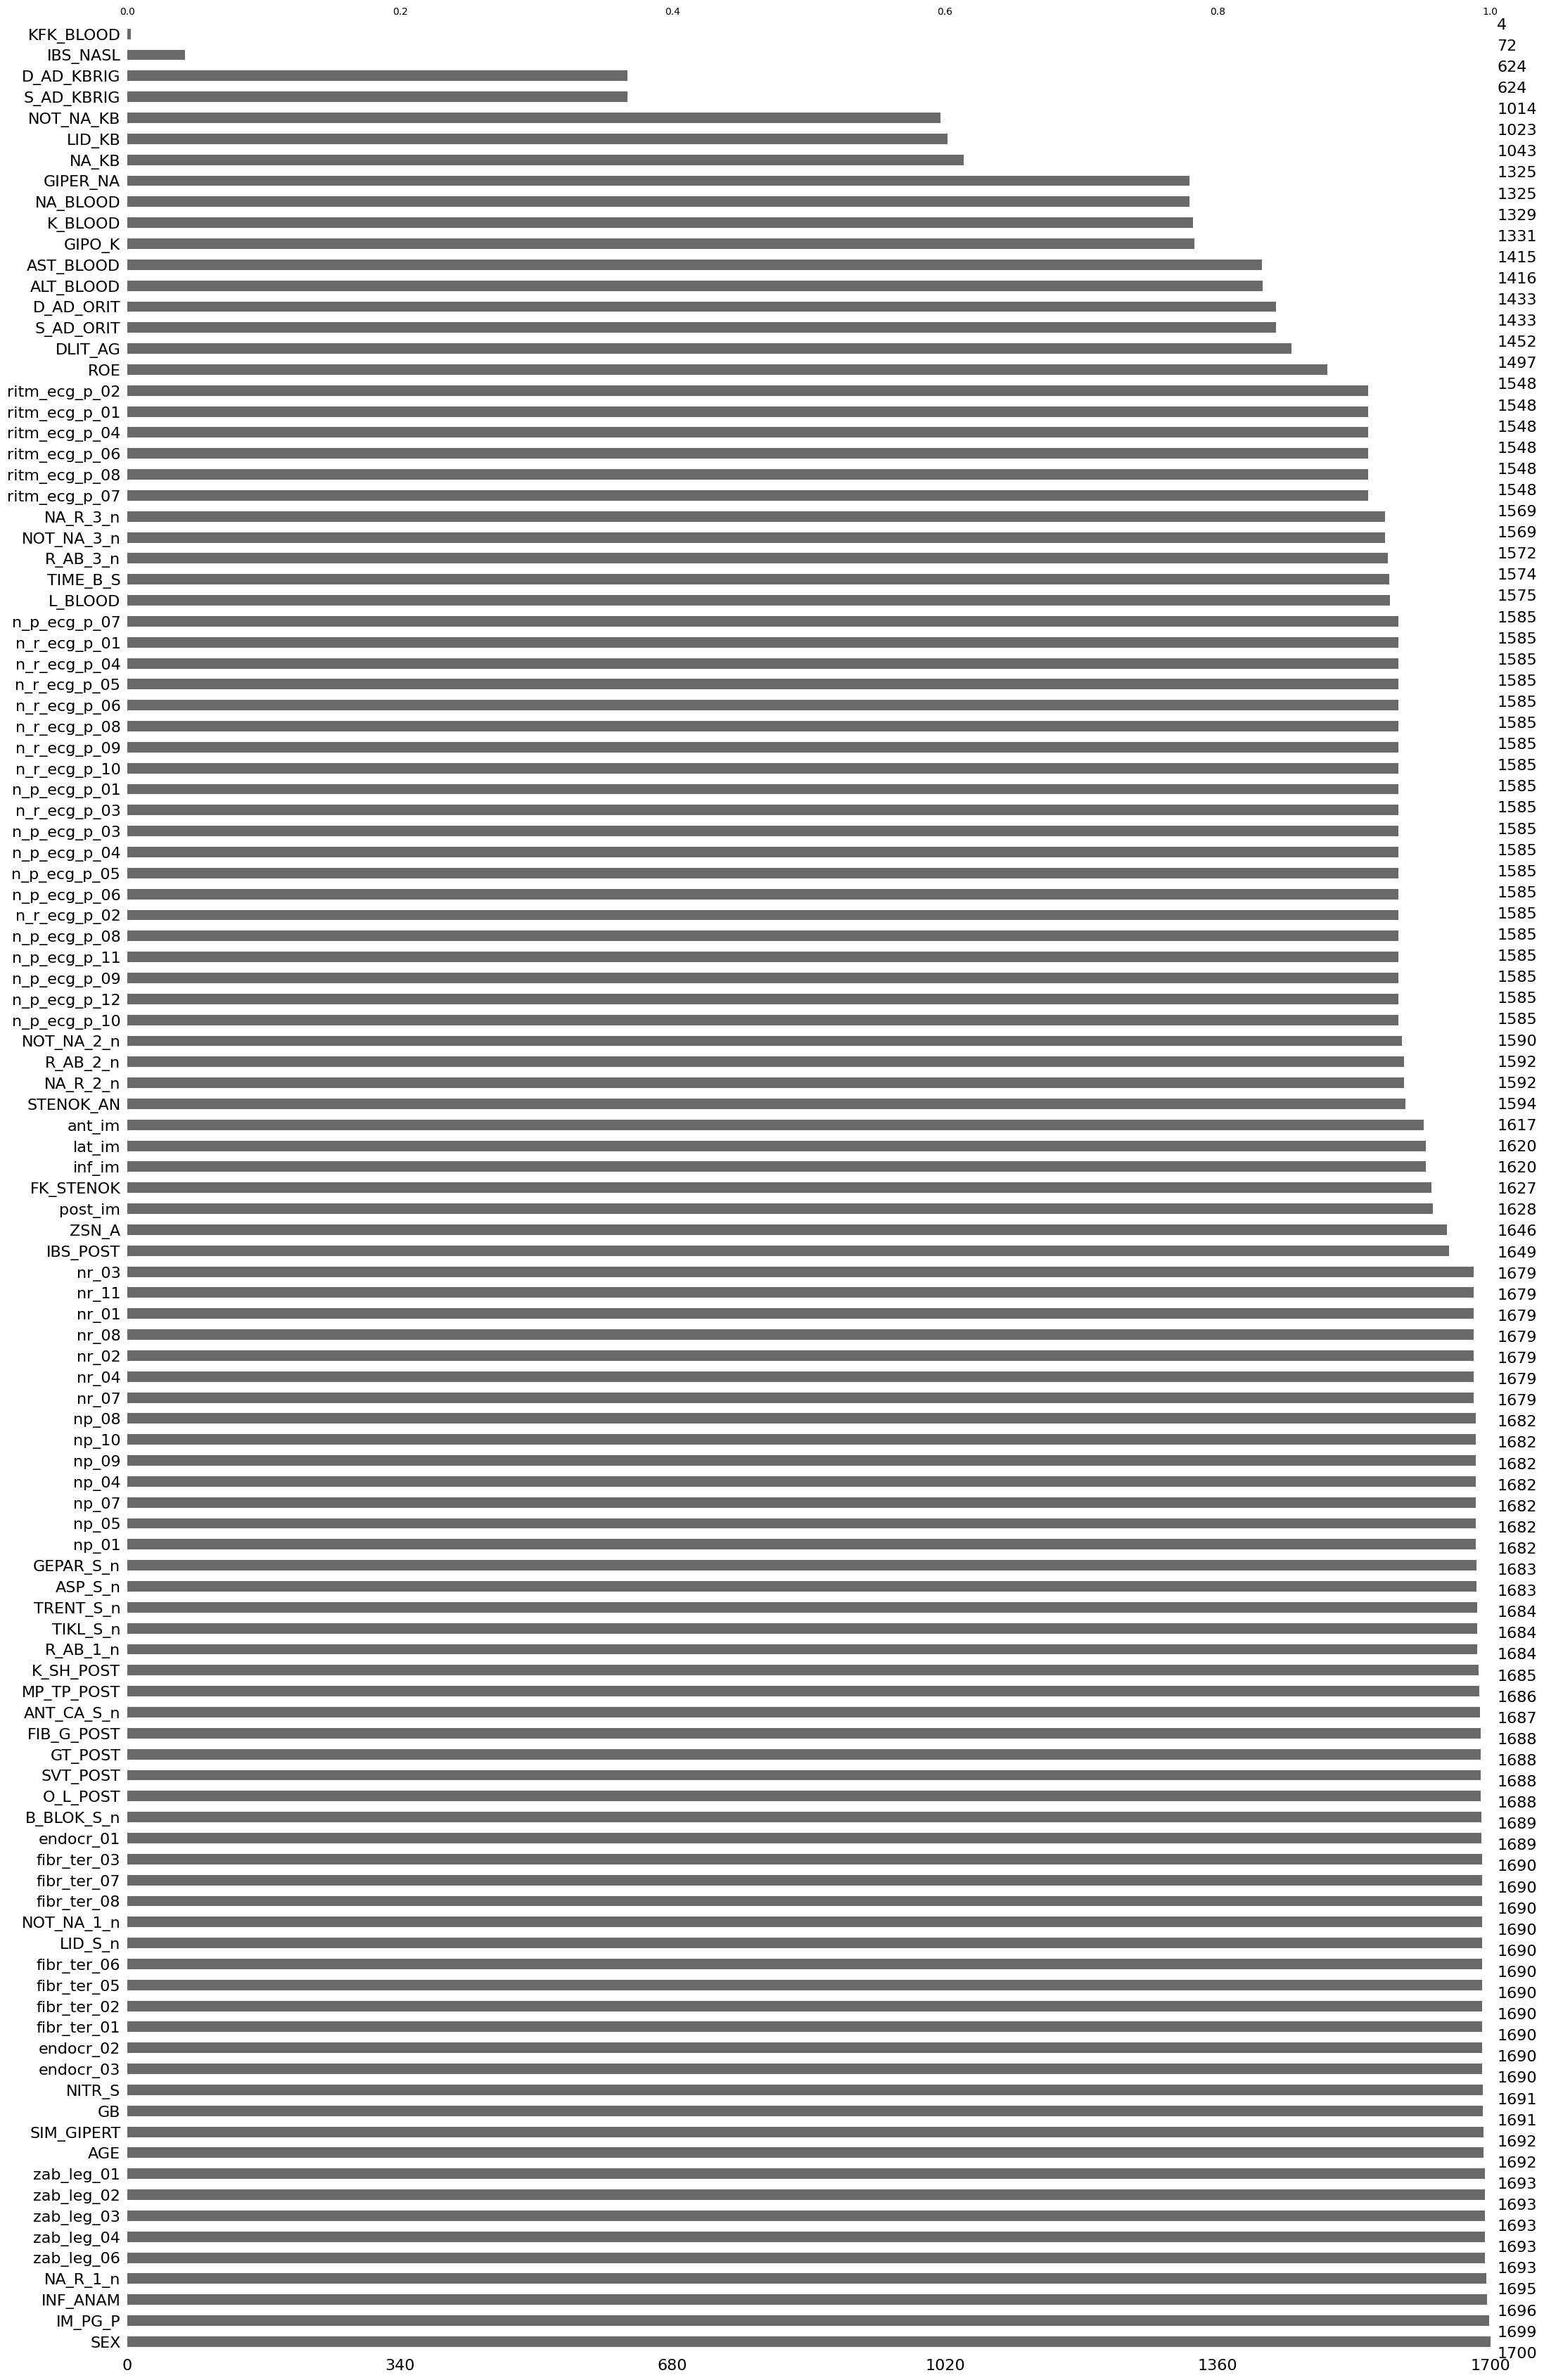

In [110]:
missing_counts = X.isnull().sum()
sorted_columns = missing_counts.sort_values().index
sorted_df = X[sorted_columns]
mis.bar(sorted_df)

In [9]:
y

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0,0,0,1,0,1,0,0,0,0,3
1696,0,0,0,0,0,0,0,0,0,0,0,1
1697,0,0,0,0,0,0,0,0,0,1,0,6
1698,0,0,0,0,0,1,0,0,0,0,0,1


In [111]:
#Survive
y[(y["LET_IS"] == 0)]

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,0,0,0,0,0,0,0,1,1,0,0
1425,0,0,0,0,0,0,0,0,0,0,1,0
1464,0,0,1,0,1,0,0,0,0,0,0,0
1525,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
# variable information 
myocardial_infarction_complications.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Record ID (ID): Unique identifier. Cannot be r...,None,no
1,AGE,Feature,Integer,Age,Age of patient.,None,no
2,SEX,Feature,Binary,Sex,"0: female, 1: male",None,no
3,INF_ANAM,Feature,Categorical,None,Quantity of myocardial infarctions in the anam...,None,yes
4,STENOK_AN,Feature,Categorical,None,Exertional angina pectoris in the anamnesis. \...,None,yes
...,...,...,...,...,...,...,...
119,DRESSLER,Target,Binary,None,Dressler syndrome,None,no
120,ZSN,Target,Binary,None,Chronic heart failure,None,no
121,REC_IM,Target,Binary,None,Relapse of the myocardial infarction,None,no
122,P_IM_STEN,Target,Binary,None,Post-infarction angina,None,no


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
darwin = fetch_ucirepo(id=732) 
  
# data (as pandas dataframes) 
X = darwin.data.features 
y = darwin.data.targets 
  
# metadata 
print(darwin.metadata) 
  
# variable information 
darwin.variables

{'uci_id': 732, 'name': 'DARWIN', 'repository_url': 'https://archive.ics.uci.edu/dataset/732/darwin', 'data_url': 'https://archive.ics.uci.edu/static/public/732/data.csv', 'abstract': 'The DARWIN dataset includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 174, 'num_features': 451, 'feature_types': [], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2022, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C55D0K', 'creators': ['Francesco Fontanella'], 'intro_paper': {'title': 'Diagnosing Alzheimer’s disease from on-line handwriting: A novel dataset and performance benchmarking', 'authors': 'Nicole D. Cilia, Giuseppe De Gregorio , Claudio De Stefano, Francesco Fontanella, 

,name,role,type,demographic,description,units,missing_values
0,ID,Feature,Categorical,None,None,None,no
1,air_time1,Feature,Integer,None,None,None,no
2,disp_index1,Feature,Categorical,None,None,None,no
3,gmrt_in_air1,Feature,Continuous,None,None,None,no
4,gmrt_on_paper1,Feature,Continuous,None,None,None,no
...,...,...,...,...,...,...,...
447,paper_time25,Feature,Integer,None,None,None,no
448,pressure_mean25,Feature,Continuous,None,None,None,no
449,pressure_var25,Feature,Continuous,None,None,None,no
450,total_time25,Feature,Integer,None,None,None,no


# Check Outliner

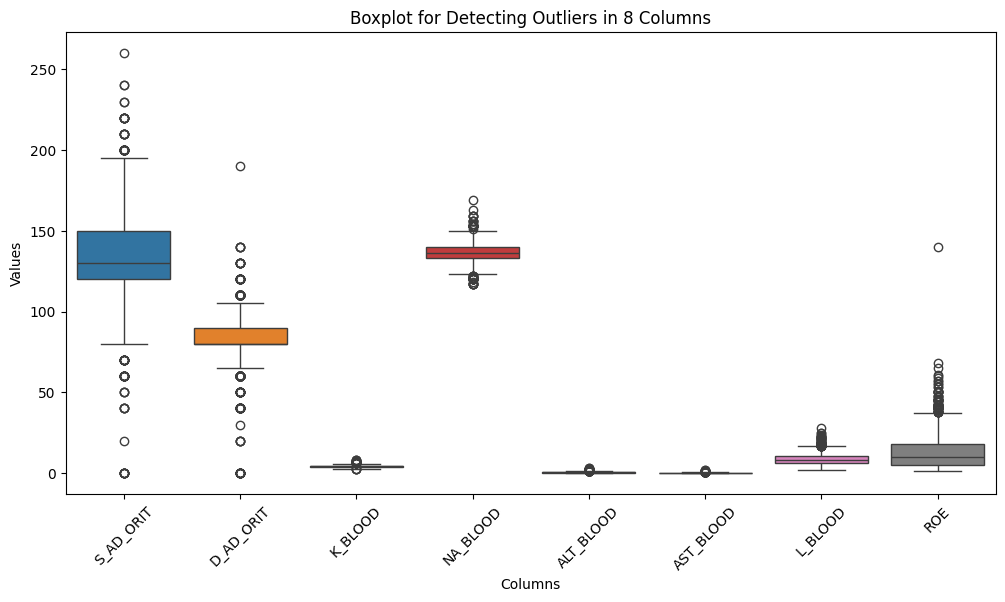

In [34]:
#이상치 체크

plt.figure(figsize=(12, 6))
sns.boxplot(data=X[['S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE']])
plt.title('Boxplot for Detecting Outliers in 8 Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

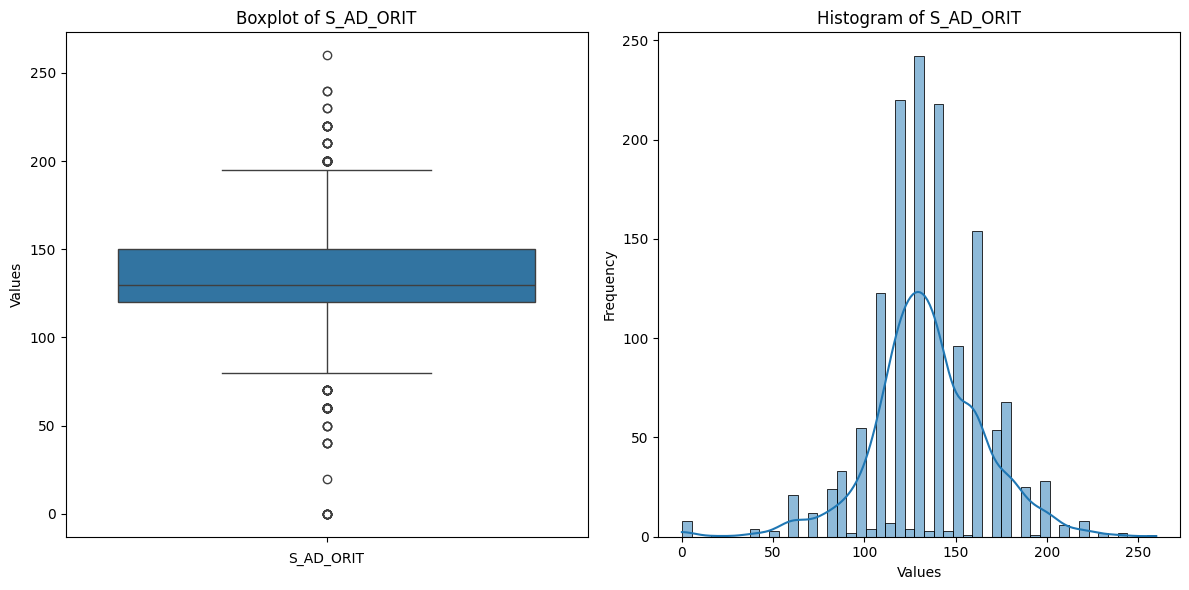

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot on the first subplot
sns.boxplot(data=X['S_AD_ORIT'], ax=axs[0])
axs[0].set_title('Boxplot of S_AD_ORIT')
axs[0].set_ylabel('Values')
axs[0].set_xlabel('S_AD_ORIT')

# Histogram on the second subplot
sns.histplot(data=X['S_AD_ORIT'], kde=True, ax=axs[1])  # KDE=True to show a density estimate
axs[1].set_title('Histogram of S_AD_ORIT')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Values')

# Display the plots
plt.tight_layout()
plt.show()

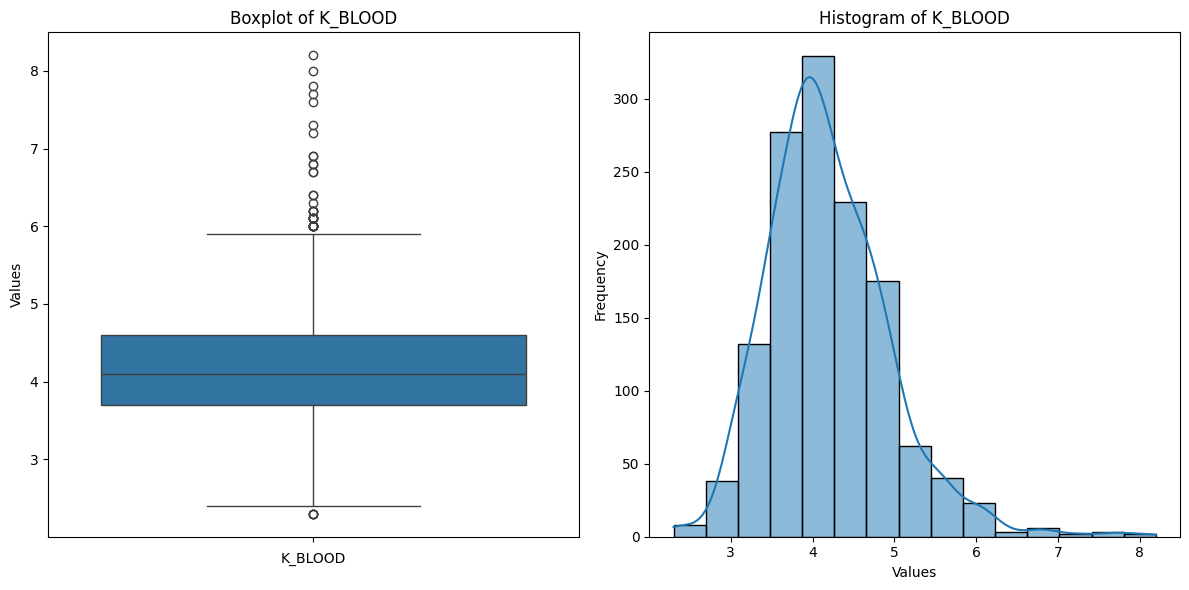

In [73]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(data=X['K_BLOOD'], ax=axs[0])
axs[0].set_title('Boxplot of K_BLOOD')
axs[0].set_ylabel('Values')
axs[0].set_xlabel('K_BLOOD')

sns.histplot(data=X['K_BLOOD'], kde=True, ax=axs[1], bins=15)
axs[1].set_title('Histogram of K_BLOOD')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Values')

plt.tight_layout()
plt.show()

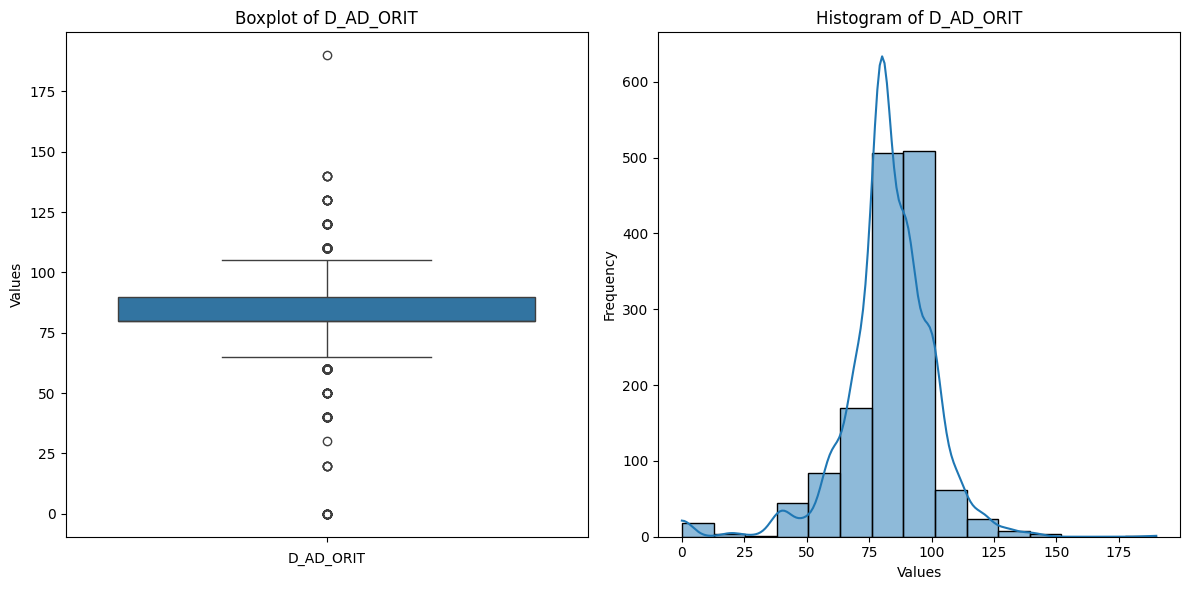

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(data=X['D_AD_ORIT'], ax=axs[0])
axs[0].set_title('Boxplot of D_AD_ORIT')
axs[0].set_ylabel('Values')
axs[0].set_xlabel('D_AD_ORIT')

sns.histplot(data=X['D_AD_ORIT'], kde=True, ax=axs[1], bins=15)
axs[1].set_title('Histogram of D_AD_ORIT')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Values')

plt.tight_layout()
plt.show()

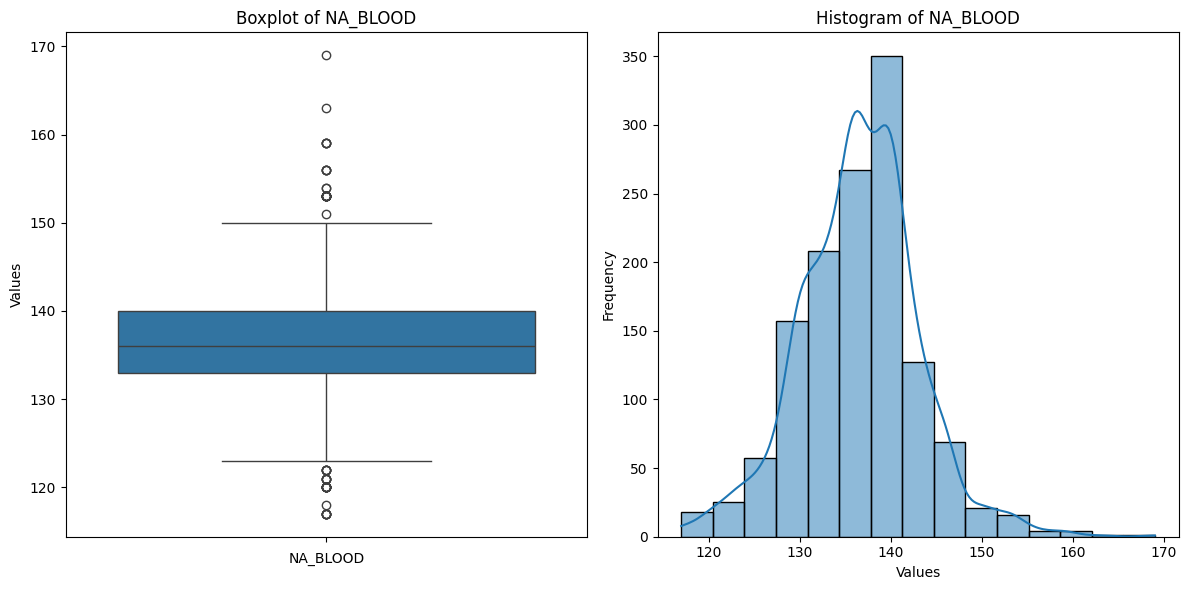

In [83]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(data=X['NA_BLOOD'], ax=axs[0])
axs[0].set_title('Boxplot of NA_BLOOD')
axs[0].set_ylabel('Values')
axs[0].set_xlabel('NA_BLOOD')

sns.histplot(data=X['NA_BLOOD'], kde=True, ax=axs[1], bins=15)
axs[1].set_title('Histogram of NA_BLOOD')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Values')

plt.tight_layout()
plt.show()

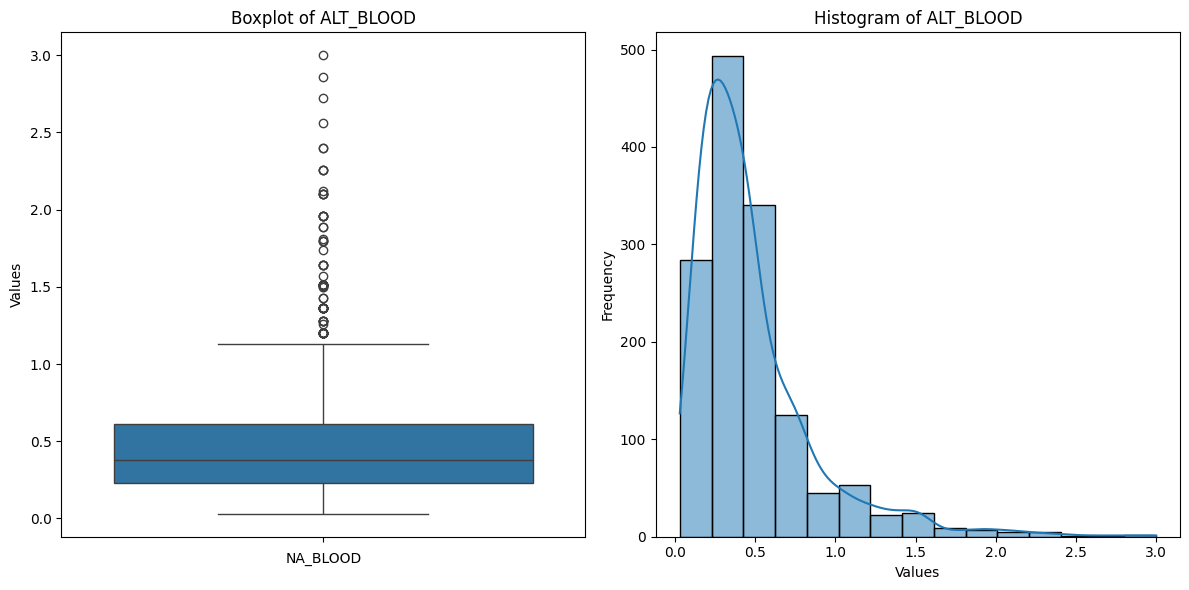

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(data=X['ALT_BLOOD'], ax=axs[0])
axs[0].set_title('Boxplot of ALT_BLOOD')
axs[0].set_ylabel('Values')
axs[0].set_xlabel('NA_BLOOD')

sns.histplot(data=X['ALT_BLOOD'], kde=True, ax=axs[1], bins=15)
axs[1].set_title('Histogram of ALT_BLOOD')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Values')

plt.tight_layout()
plt.show()

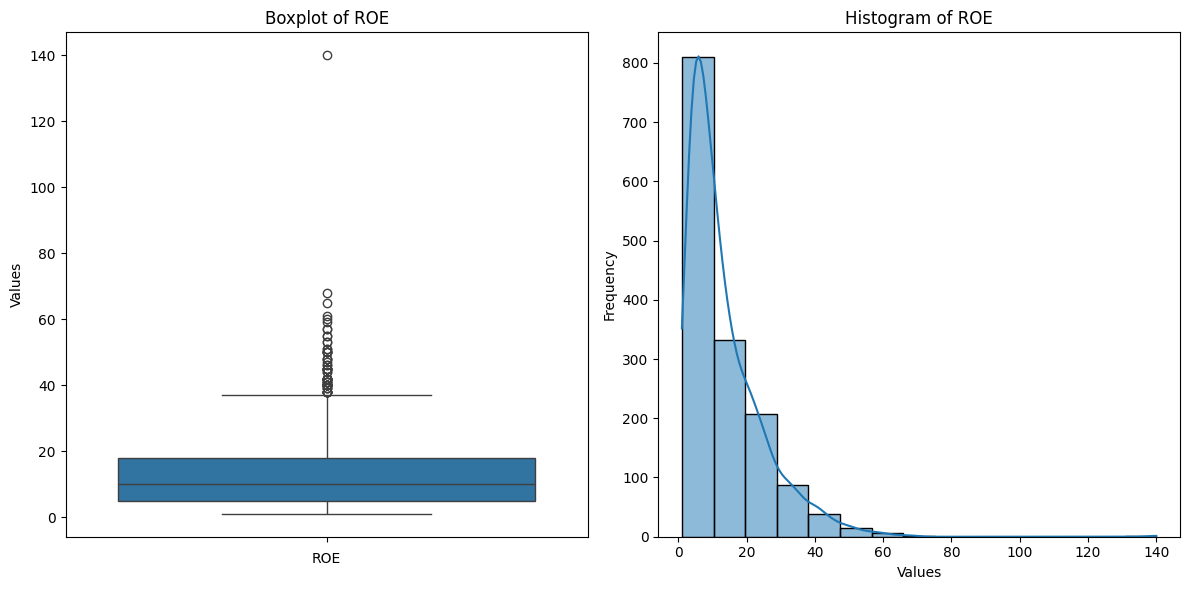

In [95]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(data=X['ROE'], ax=axs[0])
axs[0].set_title('Boxplot of ROE')
axs[0].set_ylabel('Values')
axs[0].set_xlabel('ROE')

sns.histplot(data=X['ROE'], kde=True, ax=axs[1], bins=15)
axs[1].set_title('Histogram of ROE')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Values')

plt.tight_layout()
plt.show()

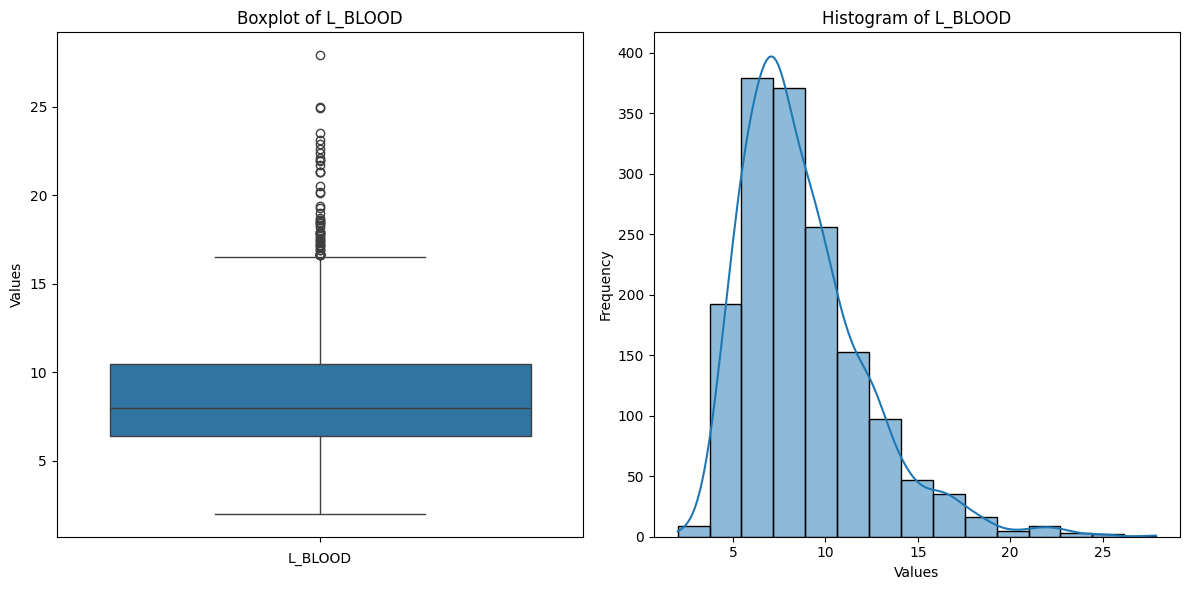

In [90]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(data=X['L_BLOOD'], ax=axs[0])
axs[0].set_title('Boxplot of L_BLOOD')
axs[0].set_ylabel('Values')
axs[0].set_xlabel('L_BLOOD')

sns.histplot(data=X['L_BLOOD'], kde=True, ax=axs[1], bins=15)
axs[1].set_title('Histogram of L_BLOOD')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Values')

plt.tight_layout()
plt.show()

In [102]:
X[X['ROE'] >= 25]['ROE']

9       30.0
13      27.0
20      65.0
35      32.0
47      28.0
        ... 
1660    34.0
1673    34.0
1686    37.0
1687    25.0
1689    27.0
Name: ROE, Length: 224, dtype: float64

In [109]:
y.iloc[1687]

FIBR_PREDS    0
PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        6
Name: 1687, dtype: int64

In [87]:
y.iloc[1451]

FIBR_PREDS    1
PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      1
ZSN           1
REC_IM        0
P_IM_STEN     0
LET_IS        6
Name: 1451, dtype: int64

In [44]:
y.iloc[1578]

FIBR_PREDS    0
PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      1
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        1
Name: 1578, dtype: int64

In [45]:
y.iloc[1604]

FIBR_PREDS    0
PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        7
Name: 1604, dtype: int64